<a href="https://colab.research.google.com/github/valihuseyin/AI_101/blob/main/DeepLearning_DerinOgrenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Yapay Sinir Ağları

In [5]:
import pandas as pd

## Classification

In [3]:
ls

pima-indians-diabetes.csv  sample_data/


In [6]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
#x  i alalım. df de ki outcome kolonunu alalım. hasta mo değil mi
x= df.drop('Outcome',axis=1) # axis: kolonu tamamen #x tahmin datası
#y hedef datası
y = df[['Outcome']]


In [15]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [45]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y = df[['Outcome']]

In [22]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [23]:
# ya da
x =df.iloc[:0,8] # ilk 8 sütün
y = df.iloc[0:,8] # 8 den sonraki sütün

In [24]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Modelimizi hazırlayalım

In [25]:
model = Sequential()

In [39]:
model.add(Dense(120,activation='relu')) # giriş nern sayısımız sütün sayımız kadar olsun.
#dense: ara katman layera konacak neron sayısı 120 tane neron var.
model.add(Dense(256,activation='relu')) # 2.layer
model.add(Dense(128,activation='relu')) # 3.layer
model.add(Dense(30,activation='relu')) # 4.layer
model.add(Dense(4,activation='relu')) # 5.layer
model.add(Dense(1,activation='sigmoid')) #sigmoid çıktısı vet  hayır binary bunun için uygun olan
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#

In [46]:
history=model.fit(x,y, epochs=250,batch_size=32, validation_split=0.1,verbose=1)
#epochs : bir sokakta gedip gelme tekrar etme, ezberleme çok iyi biliyorum algısı

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6444 - loss: 0.6707 - val_accuracy: 0.5974 - val_loss: 0.6971
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6923 - loss: 0.6077 - val_accuracy: 0.5974 - val_loss: 0.6632
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6349 - loss: 0.6412 - val_accuracy: 0.5974 - val_loss: 0.6653
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6554 - loss: 0.6409 - val_accuracy: 0.5974 - val_loss: 0.6907
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6458 - loss: 0.6351 - val_accuracy: 0.5974 - val_loss: 0.7032
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6625 - loss: 0.6403 - val_accuracy: 0.5974 - val_loss: 0.6943
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6495 - loss: 0.6279 - val_accuracy: 0.5974 - val_loss: 0.7041
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6435 - loss: 0.6464 - val_accuracy: 0.5

In [43]:
x

,Outcome


In [37]:
y.shape

(768,)

In [47]:
## Bütün veriler normalize edilmeli.

In [48]:
from sklearn.preprocessing import normalize,scale

In [49]:
x=normalize(x)

In [50]:
history=model.fit(x,y, epochs=250,batch_size=32, validation_split=0.10,verbose=1)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5709 - loss: 6.0638 - val_accuracy: 0.4026 - val_loss: 1.0355
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3450 - loss: 1.0180 - val_accuracy: 0.5974 - val_loss: 0.7047
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6487 - loss: 0.6733 - val_accuracy: 0.5974 - val_loss: 0.6754
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6665 - loss: 0.6404 - val_accuracy: 0.5974 - val_loss: 0.6827
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6802 - loss: 0.6288 - val_accuracy: 0.5974 - val_loss: 0.6763
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6568 - loss: 0.6456 - val_accuracy: 0.5974 - val_loss: 0.6923
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6637 - loss: 0.6379 - val_accuracy: 0.5974 - val_loss: 0.6760
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6521 - loss: 0.6469 - val_accuracy: 0.5974 

In [51]:
import matplotlib.pyplot as plt

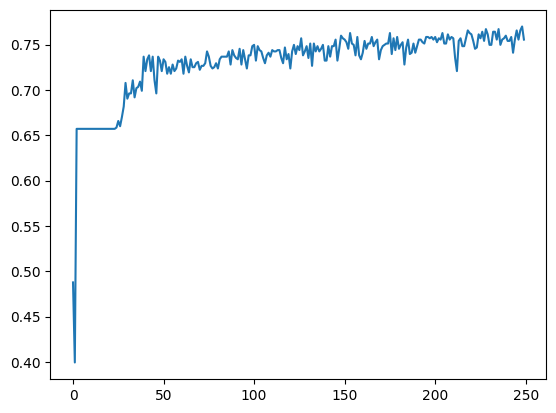

In [54]:
plt.plot(history.history['accuracy'],label='train')

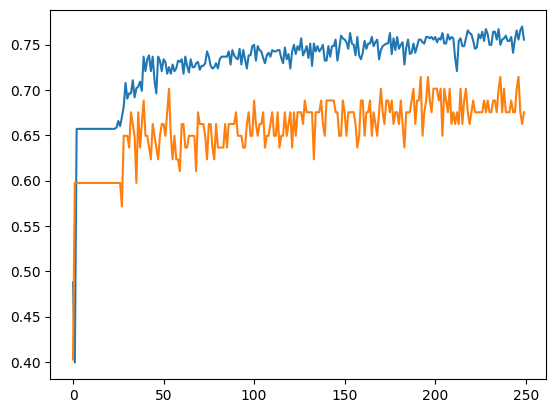

In [55]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')


## REGRESSION

In [56]:
df = pd.read_pickle('kc_house.pkl')

In [57]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
x = df.drop('price',axis=1)

In [80]:
x = scale(x)

In [81]:
x=normalize(x)

In [60]:
y= df[['price']]

In [87]:
model = Sequential()
model.add(Dense(80,activation='relu')) # giriş nern sayısımız sütün sayımız kadar olsun.
#dense: ara katman layera konacak neron sayısı 120 tane neron var.
model.add(Dense(116,activation='relu')) # 2.layer
model.add(Dense(70,activation='relu')) # 3.layer
model.add(Dense(30,activation='relu')) # 4.layer
model.add(Dense(4,activation='relu')) # 5.layer
model.add(Dense(1)) #regression sigmoond yapmaya gerek yok
model.compile(loss='mse',optimizer='adam')

In [71]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [93]:
history=model.fit(x_train,y_train, epochs=150,batch_size=120, validation_data=(x_test,y_test),verbose=1)

Epoch 1/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12557283328.0000 - val_loss: 13210993664.0000
Epoch 2/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12372600832.0000 - val_loss: 13112265728.0000
Epoch 3/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12847974400.0000 - val_loss: 13006896128.0000
Epoch 4/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12597588992.0000 - val_loss: 12921425920.0000
Epoch 5/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12078028800.0000 - val_loss: 12868385792.0000
Epoch 6/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12970716160.0000 - val_loss: 12790706176.0000
Epoch 7/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12053641216.0000 - val_loss: 12693580800.0000
Epoch 8/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12184599552.0000 - val_loss: 12602200064.0000
Epoch 9/150
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11825363968.0000 - val_loss: 12516485120.0000
Epoch 10/150
127/127 ━━━━━━━━━━━━━━━━

In [94]:
tahmin = model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [75]:
from sklearn.metrics import mean_squared_error,r2_score

In [95]:
r2_score(y_test,tahmin)

0.8102142810821533

In [96]:
mean_squared_error(y_test,tahmin)**.5

98566.03098431021

In [99]:
df = pd.read_excel('cars.xls')

In [100]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [102]:
x=df.drop('Price',axis=True)

In [106]:
x = pd.get_dummies(x,drop_first=True)

In [103]:
y=df[['Price']]

In [104]:
from sklearn.preprocessing import StandardScaler

In [107]:
x=StandardScaler().fit_transform(x)

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [117]:
model = Sequential()
model.add(Dense(80,activation='relu')) # giriş nern sayısımız sütün sayımız kadar olsun.
#dense: ara katman layera konacak neron sayısı 120 tane neron var.
model.add(Dense(116,activation='relu')) # 2.layer
model.add(Dense(70,activation='relu')) # 3.layer
model.add(Dense(30,activation='relu')) # 4.layer
model.add(Dense(4,activation='relu')) # 5.layer
model.add(Dense(1)) #regression sigmoond yapmaya gerek yok
model.compile(loss='mse',optimizer='adam')

Early Stoping

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
early_stop = EarlyStopping()

In [123]:
history=model.fit(x_train,y_train, epochs=10,batch_size=32, validation_data=(x_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 578811.3750 - val_loss: 696109.1875
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 549252.1250 - val_loss: 686174.9375
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 496501.5000 - val_loss: 632145.8750
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 626886.0625 - val_loss: 630799.3750
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 551381.0625 - val_loss: 659065.4375


In [124]:
tahmin = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [125]:
r2_score(y_test,tahmin)

0.9916905164718628

In [126]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
#

In [127]:
history=model.fit(x_train,y_train, epochs=10,batch_size=32, validation_data=(x_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 539162.9375 - val_loss: 605020.6875
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 548436.4375 - val_loss: 609085.8125
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 478823.3438 - val_loss: 586123.5000
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 510775.9062 - val_loss: 611717.4375
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 394791.4375 - val_loss: 593788.8125
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 437377.2500 - val_loss: 598708.3750
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 461271.7188 - val_loss: 627506.3750
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 396951.2812 - val_loss: 584433.8125
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 408016.9375 - val_loss: 583895.3125
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 452154.5625 - val_loss: 576175.1875


In [128]:
tahmin = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [129]:
r2_score(y_test,tahmin)

0.9927356243133545